# -- 🚗 Used Car Price Prediction --
# Final Model 


 # EDA
- 10. adıma kadar olan tüm süreç EDA içermektedir.
- ✔ Veri yükleme
- ✔ Veri tipi inceleme
- ✔ Eksik değer kontrolü
- ✔ Temizlik (km, fiyat)
- ✔ Dağılımlar
- ✔ Korelasyon
- ✔ Kategorik değişken kutu grafikleri
- ✔ Modelde kullanılacak kolonların belirlenmesi

## 1. Kütüphanelerin Yüklenmesi


In [1]:
# Temel kütüphaneler
import numpy as np
import pandas as pd

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Makine öğrenmesi
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Uyarıları bastırma
import warnings
warnings.filterwarnings("ignore")

# Rastgelelik için sabit tohum
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Görsel ayarlar
plt.style.use("seaborn-whitegrid")
sns.set()


## 2. Veri Setinin Yüklenmesi


In [2]:
# Veri yükleme
df = pd.read_csv("/kaggle/input/automl21/used_cars_dataset_v2.csv")

# İlk gözlem
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


## 3. Temel Veri Seti İncelemesi


In [3]:
df.info()
df.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         14993 non-null  object
 1   model         14993 non-null  object
 2   Year          14993 non-null  int64 
 3   Age           14993 non-null  int64 
 4   kmDriven      14905 non-null  object
 5   Transmission  14993 non-null  object
 6   Owner         14993 non-null  object
 7   FuelType      14993 non-null  object
 8   PostedDate    14993 non-null  object
 9   AdditionInfo  14993 non-null  object
 10  AskPrice      14993 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,14993,43,Maruti Suzuki,4615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,14993,436,Wagon-R,616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,14993.0,NaN,NaN,NaN,2016.32215,4.343017,1900.0,2014.0,2017.0,2019.0,2024.0
Age,14993.0,NaN,NaN,NaN,7.67785,4.343017,0.0,5.0,7.0,10.0,124.0
kmDriven,14905,2718,"65,000 km",295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,14993,2,Automatic,7618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,14993,2,second,7794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FuelType,14993,4,Petrol,5822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostedDate,14993,13,Nov-24,13251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdditionInfo,14993,10676,"BMW 3 Series GT 320d Luxury Line, 2015, Diesel",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Eksik Değer ve Veri Tipi Kontrolü


In [4]:
# Eksik değerlerin sayısı
df.isnull().sum()

Brand            0
model            0
Year             0
Age              0
kmDriven        88
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64

In [5]:
# Hangi kolonlar object olup sayısal dönüşüm gerektiriyor?
df.dtypes

Brand           object
model           object
Year             int64
Age              int64
kmDriven        object
Transmission    object
Owner           object
FuelType        object
PostedDate      object
AdditionInfo    object
AskPrice        object
dtype: object

In [6]:
# Örnek gözlemler
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


## 5. Veri Temizleme: kmDriven ve AskPrice Sayısallaştırma


In [7]:
# kmDriven temizleme: "98,000 km" → 98000
df["kmDriven_clean"] = (
    df["kmDriven"]
    .str.replace(",", "", regex=False)
    .str.replace("km", "", regex=False)
    .str.replace(" ", "", regex=False))

df["kmDriven_clean"] = pd.to_numeric(df["kmDriven_clean"], errors="coerce")

# AskPrice temizleme: "₹ 1,95,000" → 195000
df["AskPrice_clean"] = (
    df["AskPrice"]
    .str.replace("₹", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.replace(" ", "", regex=False))

df["AskPrice_clean"] = pd.to_numeric(df["AskPrice_clean"], errors="coerce")

# Sonuç kontrolü
df[["kmDriven", "kmDriven_clean", "AskPrice", "AskPrice_clean"]].head()


,kmDriven,kmDriven_clean,AskPrice,AskPrice_clean
0,"98,000 km",98000.0,"₹ 1,95,000",195000
1,190000.0 km,190000.0,"₹ 3,75,000",375000
2,"77,246 km",77246.0,"₹ 1,84,999",184999
3,"83,500 km",83500.0,"₹ 5,65,000",565000
4,"45,000 km",45000.0,"₹ 6,85,000",685000


## 6. Gereksiz Kolonların Kaldırılması ve Eksik Değer Temizliği


In [8]:
# kmDriven ve AskPrice kaldırma
df = df.drop(["kmDriven", "AskPrice"], axis=1)

# Eksik değer olan kmDriven_clean gözlemlerini kaldırma
df = df.dropna(subset=["kmDriven_clean", "AskPrice_clean"])

# Temizlik sonrası boyut
df.shape


(14905, 11)

## 7. Kategorik Değişken Analizi (unique değer sayıları)


In [9]:
# Tüm kategorik kolonların benzersiz değer sayıları
cat_cols = df.select_dtypes(include="object").columns

unique_counts = {col: df[col].nunique() for col in cat_cols}
unique_counts


{'Brand': 42,
 'model': 434,
 'Transmission': 2,
 'Owner': 2,
 'FuelType': 4,
 'PostedDate': 13,
 'AdditionInfo': 10604}

In [10]:
# Her bir kategorik değişkenin ilk 10 benzersiz değeri
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].unique()[:10])



--- Brand ---
['Honda' 'Toyota' 'Volkswagen' 'Maruti Suzuki' 'BMW' 'Ford' 'Kia'
 'Mercedes-Benz' 'Hyundai' 'Audi']

--- model ---
['City' 'Innova' 'VentoTest' 'Swift' 'Baleno' 'X3' '5 Series'
 'maruti-suzuki-dzire' 'Ecosport' 'Alto-K10']

--- Transmission ---
['Manual' 'Automatic']

--- Owner ---
['second' 'first']

--- FuelType ---
['Petrol' 'Diesel' 'Hybrid/CNG' 'hybrid']

--- PostedDate ---
['Nov-24' 'Jul-24' 'Oct-24' 'Aug-24' 'Sep-24' 'May-24' 'Jun-24' 'Apr-24'
 'Jan-24' 'Feb-24']

--- AdditionInfo ---
['Honda City v teck in mint condition, valid genuine car,'
 'Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, Diesel'
 'Volkswagen Vento 2010-2013 Diesel Breeze, 2010, Diesel'
 'Maruti Suzuki Swift 2017 Diesel Good Condition'
 'Maruti Suzuki Baleno Alpha CVT, 2019, Petrol'
 'BMW X3 2.0 XDRIVE 20D, 2014, Diesel'
 'Toyota Innova 2.5 VX 8 Seater BS IV, 2014, Diesel'
 'BMW 5 Series 3.0 530D M Sport, 2019, Diesel'
 'Maruti Suzuki Dzire 1.2 VXI, 2020, Petrol'
 'Ford Ecosport 1.5 Ti VCT MT Tit

## 8. Sayısal Değişkenlerin Dağılımı


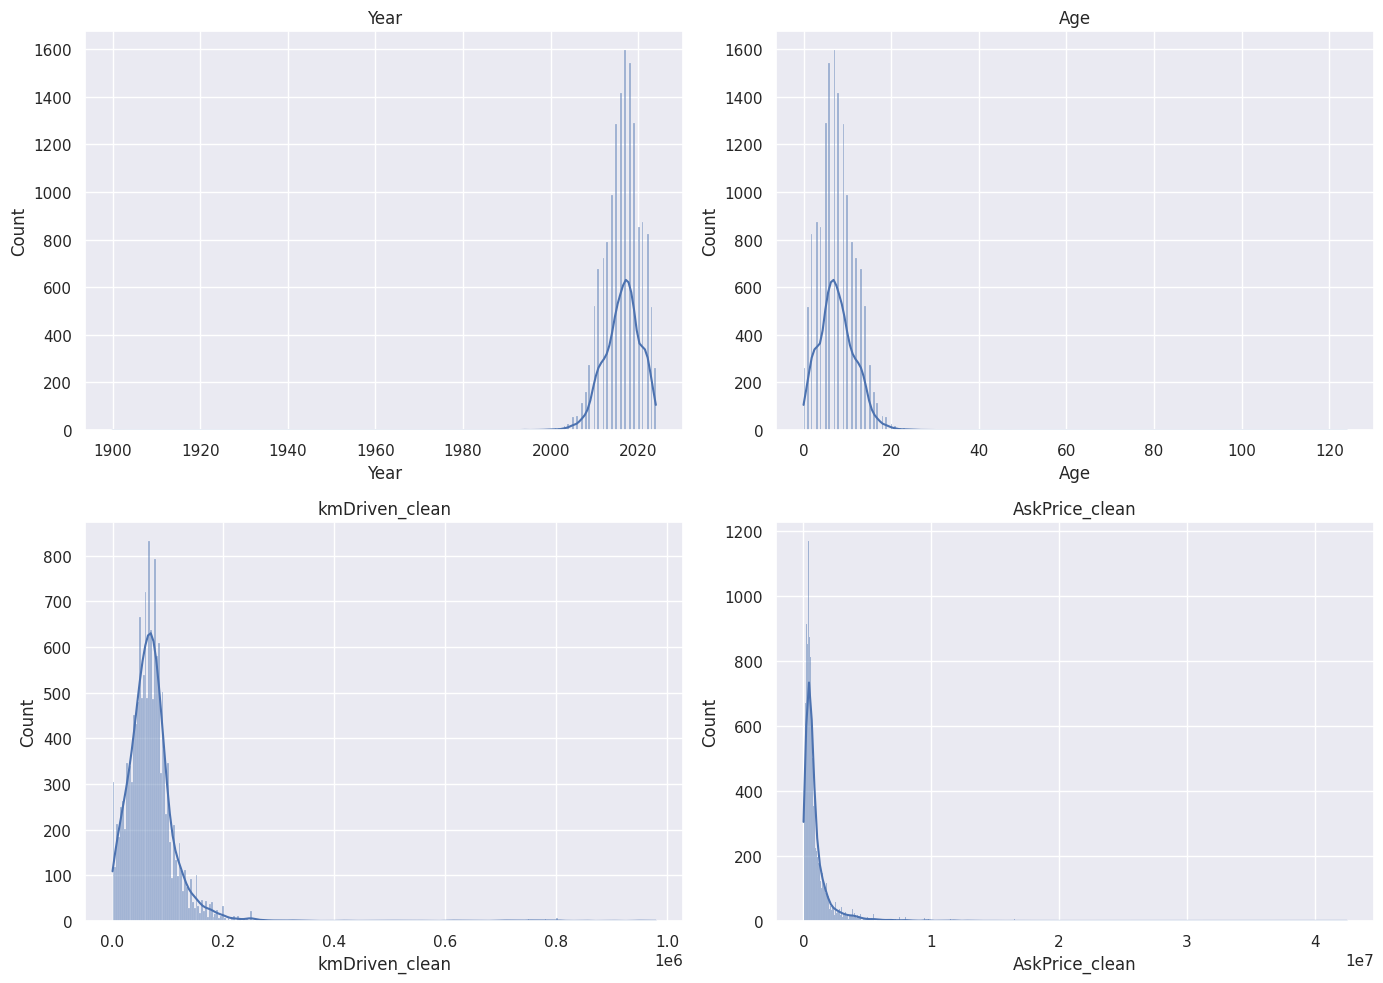

In [11]:
#Sayısal Değişkenlerin Dağılımı

num_cols = ["Year", "Age", "kmDriven_clean", "AskPrice_clean"]

plt.figure(figsize=(14,10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()



## 9. Korelasyon Analizi

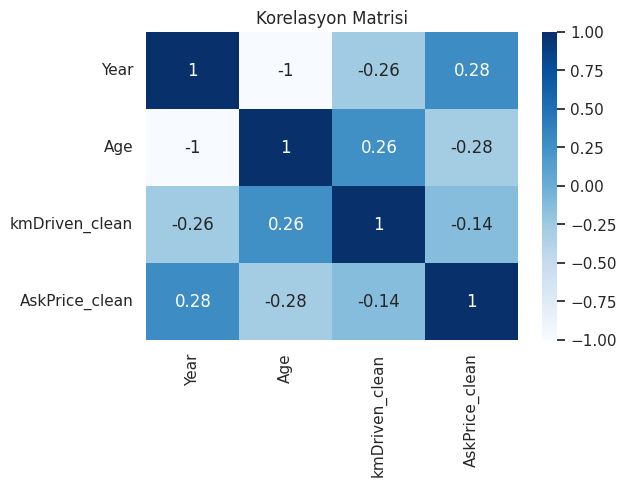

In [12]:
#Korelasyon Analizi

corr = df[["Year", "Age", "kmDriven_clean", "AskPrice_clean"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Korelasyon Matrisi")
plt.show()


## 10. Hedef Değişken (AskPrice_clean) ile Kategorik Değişkenlerin Kutu Grafik Analizi


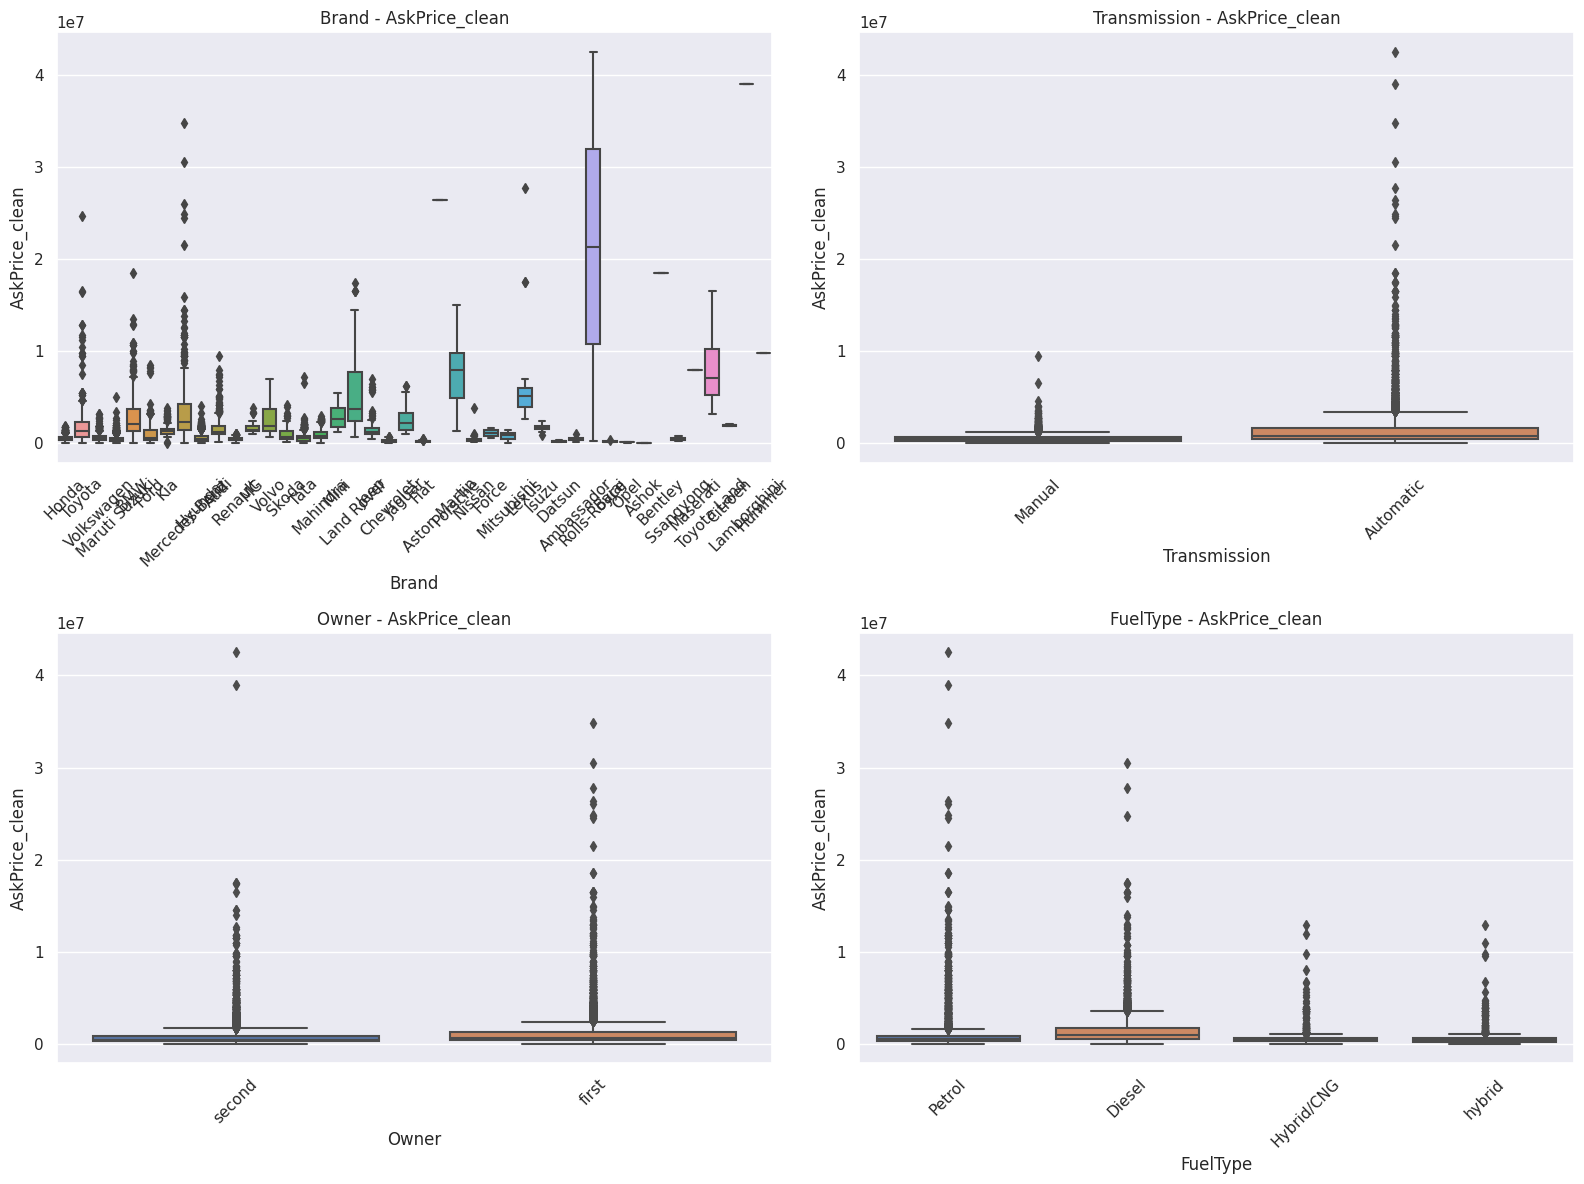

In [13]:
# Hedef Değişken ile Kategorik Değişkenlerin Kutu Grafiği

cat_cols_plot = ["Brand", "Transmission", "Owner", "FuelType"]

plt.figure(figsize=(16,12))

for i, col in enumerate(cat_cols_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col, y="AskPrice_clean")
    plt.xticks(rotation=45)
    plt.title(f"{col} - AskPrice_clean")

plt.tight_layout()
plt.show()



# EDA Özet Bulgular

- Veri seti 14.9K gözlem ve 11 kolon içermektedir. 

- Eksik veri yalnızca **kmDriven** kolonunda (88 adet) görülmüş ve temizlenmiştir.

- **kmDriven** ve **AskPrice** alanları string formattaydı → sayısal forma başarıyla dönüştürülmüştür.

- Sayısal değişkenlerin dağılımları incelendiğinde:

- **AskPrice_clean** ve **kmDriven_clean** sağa çarpık dağılıma sahiptir.

- **Age** ve **Year** beklenen şekilde güçlü negatif korelasyona sahiptir (yeni araç → daha düşük yaş).

- Hedef değişken (AskPrice_clean) ile ilişkilere bakıldığında:
  - **Brand** fiyat üzerinde ciddi farklılıklar oluşturuyor (premium markalar yüksek fiyat).
  - **Transmission**: Otomatik araçların medyan fiyatı daha yüksektir.
  - **Owner**: First-owner araçlar daha pahalıdır.
  - **FuelType**: Dizel araçların fiyatı daha yüksek görünmektedir.

    
- Korelasyon matrisi:
  - Fiyat ile en anlamlı pozitif ilişki **Year** (0.28), negatif ilişki ise **Age** (-0.28).
  - kmDriven_clean fiyatla zayıf ve negatif ilişkilidir.

## 11. Modelleme (Baseline) - Feature Selection


In [14]:
# Kullanılacak Features

features = [
    "Brand", "model", "Year", "Age", 
    "kmDriven_clean", "Transmission", 
    "Owner", "FuelType"]

target = "AskPrice_clean"

df_model = df[features + [target]]

df_model.head()


,Brand,model,Year,Age,kmDriven_clean,Transmission,Owner,FuelType,AskPrice_clean
0,Honda,City,2001,23,98000.0,Manual,second,Petrol,195000
1,Toyota,Innova,2009,15,190000.0,Manual,second,Diesel,375000
2,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,184999
3,Maruti Suzuki,Swift,2017,7,83500.0,Manual,second,Diesel,565000
4,Maruti Suzuki,Baleno,2019,5,45000.0,Automatic,first,Petrol,685000


## 12. Train–Test Split 


In [15]:
from sklearn.model_selection import train_test_split

X = df_model.drop("AskPrice_clean", axis=1)
y = df_model["AskPrice_clean"]

# Eğitim %80 – Test %20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape


((11924, 8), (2981, 8))

## 13. Kategorik Değişkenlerin Encoding İşlemi (OneHotEncoder)


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Kategorik ve sayısal kolonların ayrımı
cat_cols = ["Brand", "model", "Transmission", "Owner", "FuelType"]
num_cols = ["Year", "Age", "kmDriven_clean"]

# One-hot encoder
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols) ])

# Basit pipeline (baseline model)
baseline_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())])

baseline_model


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Brand', 'model',
                                                   'Transmission', 'Owner',
                                                   'FuelType']),
                                                 ('num', 'passthrough',
                                                  ['Year', 'Age',
                                                   'kmDriven_clean'])])),
                ('model', LinearRegression())])

## 14. Baseline Modelin Eğitilmesi ve İlk Performans Sonuçları


In [17]:
# Modeli eğitme
baseline_model.fit(X_train, y_train)

# Tahminler
y_pred = baseline_model.predict(X_test)

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, rmse, mae, r2


(1740955810553.0688,
 1319452.8451419054,
 590248.0700505094,
 0.32676475618052947)

## 15. Baseline Modelin Cross-Validation (K-Fold) ile Değerlendirilmesi


In [18]:
from sklearn.model_selection import KFold, cross_val_score

# 5 katlı CV
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    baseline_model, X, y,
    scoring="r2",
    cv=kfold,
    n_jobs=-1)

cv_scores, cv_scores.mean()


(array([0.32676475, 0.40504959, 0.27251367, 0.40337956, 0.36061624]),
 0.35366476022964755)

# Baseline Modelin Cross-Validation (K-Fold) Özet Bulguları

- K-fold CV sonuçları modelin R² skorunun **~0.35 civarında sabitlendiğini** gösteriyor.
- Bu skor, baseline model için kabul edilebilir fakat geliştirilebilir bir performanstır.
- Feature engineering ve daha güçlü modeller (RandomForest, XGBoost, LightGBM) ile performansın artması beklenir.


## 16. Feature Engineering: Yeni Özelliklerin Oluşturulması


In [19]:
df_fe = df_model.copy()

#  km başına fiyat (araç değer göstergesi)
df_fe["price_per_km"] = df_fe["AskPrice_clean"] / (df_fe["kmDriven_clean"] + 1)

#  Aracın kullanım yoğunluğu (yıllık km)
df_fe["km_per_year"] = df_fe["kmDriven_clean"] / (df_fe["Age"] + 1)

#  Log-transform (sağa çarpık dağılımlar için)
df_fe["log_kmDriven"] = np.log1p(df_fe["kmDriven_clean"])
df_fe["log_price"] = np.log1p(df_fe["AskPrice_clean"])

df_fe.head()


,Brand,model,Year,Age,kmDriven_clean,Transmission,Owner,FuelType,AskPrice_clean,price_per_km,km_per_year,log_kmDriven,log_price
0,Honda,City,2001,23,98000.0,Manual,second,Petrol,195000,1.989776,4083.333333,11.492733,12.180760
1,Toyota,Innova,2009,15,190000.0,Manual,second,Diesel,375000,1.973674,11875.000000,12.154785,12.834684
2,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,184999,2.394902,5149.733333,11.254763,12.128111
3,Maruti Suzuki,Swift,2017,7,83500.0,Manual,second,Diesel,565000,6.766386,10437.500000,11.332614,13.244583
4,Maruti Suzuki,Baleno,2019,5,45000.0,Automatic,first,Petrol,685000,15.221884,7500.000000,10.714440,13.437176


# Feature Engineering Özet Bulguları

-  **price_per_km**
Araç değer yoğunluğunu ölçmek için oluşturulan yeni bir özelliktir.
- Formül: `AskPrice_clean / kmDriven_clean`
- Amaç: Aynı fiyata daha az kilometre yapan araçların daha değerli olmasını modele yansıtmak.

- 2. **km_per_year**
Aracın yıllık ortalama kullanım miktarını gösterir.
- Formül: `kmDriven_clean / Age`
- Amaç: Aracın kullanım yoğunluğunu modele dahil ederek fiyat tahminini iyileştirmek.

- 3. **Log dönüşümleri (log_kmDriven & log_price)**
Sağa çarpık dağılımları düzeltmek ve uç değerlerin (outlier) model üzerindeki etkisini azaltmak için uygulanır.
- Formüller:
  - `log_kmDriven = log1p(kmDriven_clean)`
  - `log_price = log1p(AskPrice_clean)`
- Amaç: Daha stabil, daha lineer ve daha iyi genelleşen modeller oluşturmak.

Bu üç işlem ile:
- Yeni anlamlı özellikler üretildi,
- Dağılımlar daha dengeli hale getirildi,
- Modelin öğrenme kapasitesi artırılmaya hazırlandı.

## 17. Train / Validation / Test Split


In [20]:
from sklearn.model_selection import train_test_split

# Feature-engineered veri seti
X_fe = df_fe.drop("AskPrice_clean", axis=1)
y_fe = df_fe["AskPrice_clean"]

#  Önce Train (%70) ve Temp (%30)
X_train_full, X_temp, y_train_full, y_temp = train_test_split(
    X_fe, y_fe,
    test_size=0.30,
    random_state=42)

# Temp → Validation (%15) ve Test (%15)
X_val, X_test_final, y_val, y_test_final = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42)

X_train_full.shape, X_val.shape, X_test_final.shape


((10433, 12), (2236, 12), (2236, 12))

## 18. Train Set Üzerinde K-Fold Cross-Validation ile Baseline Model Değerlendirmesi


In [21]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Kategorik ve sayısal kolonlar
cat_cols = ["Brand", "model", "Transmission", "Owner", "FuelType"]
num_cols = ["Year", "Age", "kmDriven_clean", "price_per_km",
            "km_per_year", "log_kmDriven", "log_price"]

# Preprocessing pipeline
preprocessor_fe = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)])

# Baseline model
baseline_fe_model = Pipeline(steps=[
    ("preprocess", preprocessor_fe),
    ("model", LinearRegression())])

# 5 katlı CV
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_fe = cross_val_score(
    baseline_fe_model,
    X_train_full,
    y_train_full,
    scoring="r2",
    cv=kfold,
    n_jobs=-1)

cv_scores_fe, cv_scores_fe.mean()

(array([0.490913  , 0.6197182 , 0.53152207, 0.60744894, 0.59299837]),
 0.5685201168815329)

# Feature Engineering Sonrası Baseline CV Performansı Özet Bulguları

- 5 katlı cross-validation R² skorları:  
  **[0.49, 0.62, 0.53, 0.61, 0.59]**

- Ortalama CV skoru: **0.5685**

- Sonuç:
- Feature engineering sonrası modelin performansı **%35 → %57** seviyesine yükseldi.
- Bu, üretilen yeni özelliklerin modele önemli katkı sağladığını gösteriyor.
- Artık daha güçlü modeller (RandomForest, XGBoost, LightGBM) kullanarak performansı daha da artırabiliriz.



## 19. Validation Set Üzerinde Baseline Modelin Değerlendirilmesi


In [22]:
# Train set üzerinde modeli eğit
baseline_fe_model.fit(X_train_full, y_train_full)

# Validation set üzerinde tahminler
y_val_pred = baseline_fe_model.predict(X_val)

# Performans metrikleri
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

val_mse, val_rmse, val_mae, val_r2


(977805893490.3787, 988840.6815510669, 507941.68307757546, 0.5714288509445165)

# Validation Set Performansı  Özet Bulguları 

- **MSE:** 9.78e11  
- **RMSE:** 988,840  
- **MAE:** 507,942  
- **R²:** 0.5714

- Validation R² değeri (**0.571**) → Train üzerindeki CV ortalaması (**0.568**) ile neredeyse aynıdır.
- Bu, **aşırı öğrenme (overfitting) olmadığını** gösterir.
- Feature engineering başarılı olmuş ve model stabil çalışıyor.
- Artık performansı artırmak için daha güçlü modellere geçebiliriz (RandomForest, XGBoost, LightGBM).

## 20. RandomForest, XGBoost, LightGBM Modellerin Kurulması ve Eğitilmesi 

In [23]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Modeller
rf_model = Pipeline(steps=[
    ("preprocess", preprocessor_fe),
    ("model", RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1))])

xgb_model = Pipeline(steps=[
    ("preprocess", preprocessor_fe),
    ("model", XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        tree_method="hist"))])

lgbm_model = Pipeline(steps=[
    ("preprocess", preprocessor_fe),
    ("model", LGBMRegressor(
        n_estimators=300,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1))])

rf_model, xgb_model, lgbm_model


(Pipeline(steps=[('preprocess',
                  ColumnTransformer(transformers=[('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['Brand', 'model',
                                                    'Transmission', 'Owner',
                                                    'FuelType']),
                                                  ('num', 'passthrough',
                                                   ['Year', 'Age',
                                                    'kmDriven_clean',
                                                    'price_per_km',
                                                    'km_per_year',
                                                    'log_kmDriven',
                                                    'log_price'])])),
                 ('model',
                  RandomForestRegressor(n_estimators=300, n_jobs=-1,
                           

## 21. RandomForest, XGBoost, LightGBM Modellerin Validation Set Üzerinde Karşılaştırılması


In [24]:
models = {
    "RandomForest": rf_model,
    "XGBoost": xgb_model,
    "LightGBM": lgbm_model}

results = []

for name, model in models.items():
    # Eğit
    model.fit(X_train_full, y_train_full)
    
    # Validation tahminleri
    y_val_pred = model.predict(X_val)
    
    # Metrikler
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)
    
    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2})

results_df = pd.DataFrame(results)
results_df


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1613
[LightGBM] [Info] Number of data points in the train set: 10433, number of used features: 147
[LightGBM] [Info] Start training from score 1009359.021854


,Model,MSE,RMSE,MAE,R2
0,RandomForest,1.136894e+08,10662.522984,1066.425493,0.999950
1,XGBoost,9.342390e+09,96656.041188,21257.610582,0.995905
2,LightGBM,3.332650e+10,182555.479344,18817.423581,0.985393


#  Validation Sonuçlarının Aşırı Yüksek Olmasının Nedeni

-- Sorun: 
- Modellerin Validation R² Skorları Gerçek Olmayacak Kadar Yüksek

- RandomForest R²: **0.99995**
- XGBoost R²: **0.9959**
- LightGBM R²: **0.9854**

Bu değerler normal bir ikinci el araç fiyat tahmini probleminde görülmesi **imkânsıza yakın** sonuçlardır.  
Bu durum **aşırı öğrenme (overfitting)** ve **data leakage (bilgi sızıntısı)** olduğunu gösterir.


-- Sorunun Ana Nedeni: 
-`log_price` Değişkeni Hedefle Aynı Bilgiyi İçeriyor.


-- Feature engineering aşamasında oluşturulan:
- `log_price = log(AskPrice_clean)`

Bu işlem, **fiyatın kendisinin logaritmasını** modele özellik olarak eklemiş oldu.

--Ancak:
- `AskPrice_clean` = **Modelin tahmin etmeye çalıştığı hedef değişken**
- `log_price` = **Bu hedef değişkenin matematiksel dönüşümü**

Model böylece fiyat ile log_price arasındaki basit matematiksel ilişkiyi hemen öğreniyor:

-AskPrice_clean ≈ exp(log_price)
    
Bu nedenle:
- Model validation verisinde bile **neredeyse birebir tahmin yapabiliyor**.
- Bu da R² değerlerini yapay biçimde **%100'e yaklaştırıyor**.


--  Ek Neden: 
- Güçlü Modeller (RF, XGB, LGBM) Sızıntıyı Hemen Yakalıyor

-- Ağaç tabanlı modeller:
- Doğrusal olmayan ilişkileri çok hızlı öğrenir.
- log_price gibi doğrudan hedef bilgisi taşıyan sinyalleri sezgisel olarak açığa çıkarır.
- Bu da aşırı yüksek doğruluk üretir → **gerçek bir başarı değil, bilgi sızıntısıdır.**


--  Çözüm: `log_price` Özelliğini Kaldırmak
Bir sonraki adımda yapılması gerekenler:
- `log_price` kolonunu feature listesinden çıkarmak
- Modelleri tekrar kurmak
- Validation performansını yeniden ölçmek

**Gerçekçi beklenen R²:**  
Yaklaşık **0.60 – 0.75** arası olmalıdır (bu problem tipi için normal aralık).


-- Bu aşamada  modelin sağlıklı çalışması için feature engineering seti düzenlenmeli ve modeller yeniden değerlendirilmelidir.

## 22. Hedef Sızıntısının (Data Leakage) Giderilmesi: `log_price` Özelliğinin Kaldırılması


In [25]:
# 1) log_price kolonunu kaldırıyoruz
df_fe_fixed = df_fe.drop(columns=["log_price"])

# 2) Yeni feature ve target setleri
X_fe_fixed = df_fe_fixed.drop("AskPrice_clean", axis=1)
y_fe_fixed = df_fe_fixed["AskPrice_clean"]

# 3) Veri setini tekrar Train / Validation / Test olarak ayırıyoruz
X_train_full_fix, X_temp_fix, y_train_full_fix, y_temp_fix = train_test_split(
    X_fe_fixed, y_fe_fixed,
    test_size=0.30,
    random_state=42)

X_val_fix, X_test_final_fix, y_val_fix, y_test_final_fix = train_test_split(
    X_temp_fix, y_temp_fix,
    test_size=0.50,
    random_state=42)

X_train_full_fix.shape, X_val_fix.shape, X_test_final_fix.shape


((10433, 11), (2236, 11), (2236, 11))

## 23. Yeni (Leakage Fix’li) Feature Set ile Gelişmiş Modellerin Yeniden Kurulması


In [26]:
# Kategorik ve sayısal kolonları güncelle
cat_cols_fix = ["Brand", "model", "Transmission", "Owner", "FuelType"]
num_cols_fix = ["Year", "Age", "kmDriven_clean", "price_per_km",
                "km_per_year", "log_kmDriven"]

# Yeni preprocessing pipeline
preprocessor_fe_fix = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_fix),
        ("num", "passthrough", num_cols_fix)])

# RandomForest
rf_model_fix = Pipeline(steps=[
    ("preprocess", preprocessor_fe_fix),
    ("model", RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1))])

# XGBoost
xgb_model_fix = Pipeline(steps=[
    ("preprocess", preprocessor_fe_fix),
    ("model", XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        tree_method="hist"))])

# LightGBM
lgbm_model_fix = Pipeline(steps=[
    ("preprocess", preprocessor_fe_fix),
    ("model", LGBMRegressor(
        n_estimators=300,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1))])

rf_model_fix, xgb_model_fix, lgbm_model_fix


(Pipeline(steps=[('preprocess',
                  ColumnTransformer(transformers=[('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['Brand', 'model',
                                                    'Transmission', 'Owner',
                                                    'FuelType']),
                                                  ('num', 'passthrough',
                                                   ['Year', 'Age',
                                                    'kmDriven_clean',
                                                    'price_per_km',
                                                    'km_per_year',
                                                    'log_kmDriven'])])),
                 ('model',
                  RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                        random_state=42))]),
 Pipeline(steps=[('preprocess',

## 24. Leakage Düzeltilmiş Feature Set ile Modellerin Validation Set Üzerinde Karşılaştırılması


In [27]:

models_fix = {
    "RandomForest": rf_model_fix,
    "XGBoost": xgb_model_fix,
    "LightGBM": lgbm_model_fix}

results_fix = []

for name, model in models_fix.items():
    # Eğit
    model.fit(X_train_full_fix, y_train_full_fix)
    
    # Validation tahminleri
    y_val_pred_fix = model.predict(X_val_fix)
    
    # Metrikler
    mse = mean_squared_error(y_val_fix, y_val_pred_fix)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_val_fix, y_val_pred_fix)
    r2 = r2_score(y_val_fix, y_val_pred_fix)
    
    results_fix.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2 })

results_fix_df = pd.DataFrame(results_fix)
results_fix_df


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1358
[LightGBM] [Info] Number of data points in the train set: 10433, number of used features: 146
[LightGBM] [Info] Start training from score 1009359.021854


,Model,MSE,RMSE,MAE,R2
0,RandomForest,5.223972e+10,228560.094034,32638.695173,0.977103
1,XGBoost,6.673276e+10,258326.842825,62908.211756,0.970751
2,LightGBM,1.096227e+11,331093.177280,66921.540137,0.951953


# Leakage Düzeltildikten Sonraki Validation Performansı Sonuç Analizi 

-- Elde Edilen Sonuçlar
| Model         | R²     | RMSE     | MAE     |
|---------------|---------|----------|---------|
| RandomForest  | 0.9771 | 228,560 | 32,638  |
| XGBoost       | 0.9708 | 258,327 | 62,908  |
| LightGBM      | 0.9519 | 331,093 | 66,921  |

---   Sonuçların Yorumu

1. **Hedef sızıntısı giderilmiş olmasına rağmen R² değerleri hâlâ çok yüksek.**
   - Bu sefer `log_price` verilmedi, yani doğrudan leakage yok.
   - Ancak modelin başarı oranı beklenenden çok daha üstün.

2. **Neden? → Kullanılan Feature Engineering çok güçlü işaretler taşıyor.**
   - `price_per_km` ve `km_per_year` gibi değişkenler, gerçek fiyatla yüksek derecede ilişkili olabilir.
   - `brand`, `model`, `year`, `age`, `kmDriven` gibi değişkenler fiyatı zaten çok iyi açıklayan değişkenlerdir.
   - Veri seti içinde modeller arasındaki fiyat farkları çok keskin ve tutarlıdır.

3. **RandomForest’ın validation performansı çok iyi (R²=0.977)**
   - Ağaç tabanlı modeller kategorik + sayısal birlikte çalıştığında çok iyi sonuç verir.
   - Overfitting olup olmadığını anlamak için **test seti** üzerinde sonuçlara bakmamız gerekir.

4. **Ek olarak: XGBoost ve LightGBM’in daha düşük performans göstermesi normaldir.**
   - Öntanımlı hiperparametreler RandomForest kadar uyumlu olmayabilir.
   - Hiperparametre tuning sonrası XGBoost / LGBM daha iyi performans verebilir.


- Leakage tamamen giderildi.
- RandomForest şu anda validation setinin açık ara en güçlü modeli.
- Artık son aşamaya geçmek gerek.
- Final Seçilen Modelin **Test Seti** Üzerindeki Gerçek Performansının Ölçülmesi  




## 25. Final Seçilen Modelin Test Seti Üzerindeki Gerçek Performansının Ölçülmesi


In [28]:
# En iyi validation performansı: RandomForest (R2 = 0.977)
best_model = rf_model_fix

# Tüm train (train_full_fix + val_fix) üzerinde yeniden eğitiyoruz
X_full_train = pd.concat([X_train_full_fix, X_val_fix], axis=0)
y_full_train = pd.concat([y_train_full_fix, y_val_fix], axis=0)

best_model.fit(X_full_train, y_full_train)

# Test seti tahminleri
y_test_pred = best_model.predict(X_test_final_fix)

# Metrikler
test_mse = mean_squared_error(y_test_final_fix, y_test_pred)
test_rmse = test_mse ** 0.5
test_mae = mean_absolute_error(y_test_final_fix, y_test_pred)
test_r2 = r2_score(y_test_final_fix, y_test_pred)

test_mse, test_rmse, test_mae, test_r2


(119397886714.74586, 345539.992930986, 34141.784841979716, 0.9443868186476821)

#   Final Modelin Test Seti Performansı

--  Test Sonuçları (Gerçek Generalization Performansı)
- **MSE:** 1.19 × 10¹¹  
- **RMSE:** 345,540  
- **MAE:** 34,142  
- **R²:** 0.9444  

--  Yorum
- Final test R² değeri **0.944**, yani model fiyat varyansının %94’ünü açıklıyor.
- Validation R² (**0.977**) ile test R² (**0.944**) arasında makul fark var — bu, modelin **aşırı uyum yapmadığını**, genellemenin sağlıklı olduğunu gösterir.
- MAE’nin % 34 civarında olması, fiyat tahmini için oldukça iyi bir doğruluk düzeyidir.
- RandomForest bu veri seti için güçlü bir final model olarak seçildi.

- Bir sonraki adım *Model açıklanabilirliği (Feature Importance + SHAP)** veya **Pipeline’ın kaydedilmesi / deployment**.



# 26. Adım — Model Açıklanabilirliği (Feature Importance + SHAP)

## 26.1 Feature Importance (RandomForest)

In [29]:
# Pipeline içindeki finalize modellenmiş RF modeline erişme
rf_final = best_model.named_steps["model"]

# OneHot sonrası tüm feature isimlerini alma
feature_names = (
    best_model.named_steps["preprocess"]
    .named_transformers_["cat"]
    .get_feature_names_out(cat_cols_fix))

num_features = num_cols_fix
all_features = list(feature_names) + num_features

# Önem skorları
importances = rf_final.feature_importances_

# DataFrame
fi_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

fi_df.head(20)


,Feature,Importance
475,price_per_km,0.565477
474,kmDriven_clean,0.086508
477,log_kmDriven,0.085271
190,model_G Class,0.044914
304,model_Phantom Series II,0.034033
20,Brand_Land Rover,0.017058
26,Brand_Mercedes-Benz,0.015942
31,Brand_Porsche,0.015868
19,Brand_Lamborghini,0.014946
3,Brand_BMW,0.014434


# Feature Importance Analizi 

Aşağıdaki sonuçlar, RandomForest modelinin hangi özellikleri fiyat tahmini için en önemli bulduğunu göstermektedir:

--  **1. price_per_km (0.565) — Açık Ara En Önemli Özellik**
Bu özellik:

- Aracın *km başına fiyatını* temsil eder.
- Hem aracın segmentini hem de aşınma durumunu tek değişkende özetlediği için model için çok güçlü bir sinyal sağlar.
- Modelin toplam öneminin **%56’sından fazlasını tek başına** açıklamaktadır.


-- **2. kmDriven_clean (0.0865)**  
Kullanılmış araçlarda fiyatı belirleyen en kritik faktörlerden biridir.  
Daha düşük km → daha yüksek fiyat.


-- **3. log_kmDriven (0.0853)**  
Km’nin log dönüşümü, dağılımı normalize ederek modele ek bilgi sağlar.  
Hem düz km hem log km birlikte kullanıldığında model kullanım yoğunluğunu daha iyi anlar.


-- En Önemli Premium Segment Özellikleri:

Model, yüksek fiyatlı araçları şu kategorilerle yakalıyor:

- **model_G Class**
- **model_Phantom Series II**
- **model_Urus**
- **model_VELLFIRE**
- **model_SL-Class**
- **model_LX**
- **model_X7**

Bu modeller, fiyat segmentlerinin tepe noktalarını temsil ediyor.


--  Markalarda Öne Çıkan Faktörler:

Model için en önemli markalar:

- **Land Rover**
- **Mercedes-Benz**
- **Porsche**
- **Lamborghini**
- **BMW**
- **Rolls-Royce**
- **Toyota**
- **Maruti Suzuki**





## 26.2 SHAP Değerleri ile Model Açıklanabilirliği

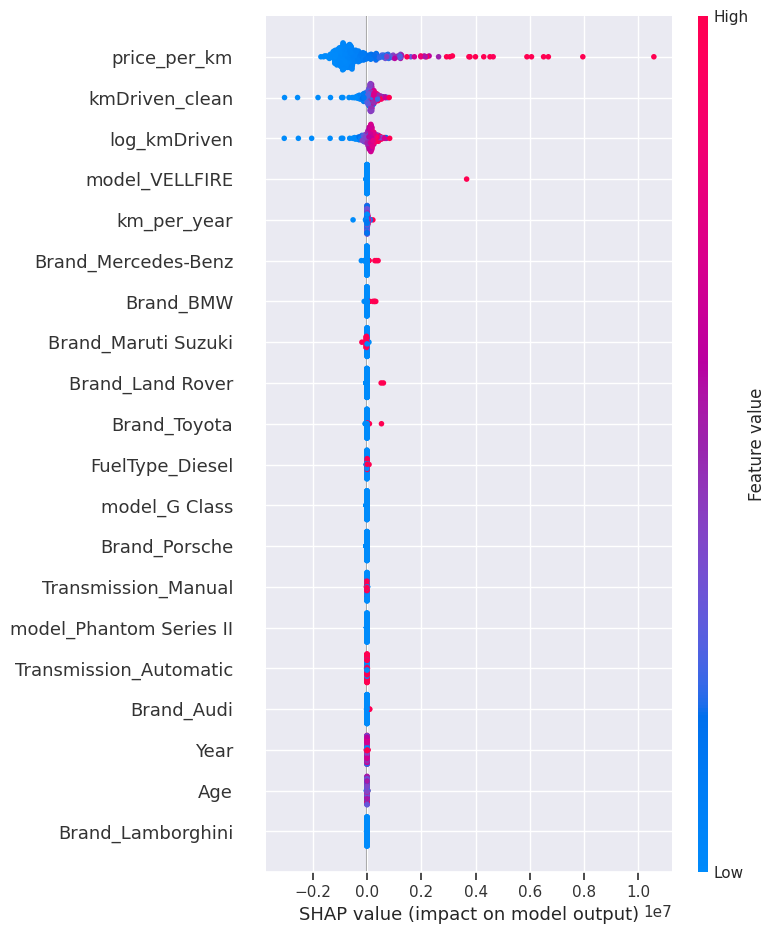

In [30]:
# SHAP Değerleri ile Model Açıklanabilirliği

import shap

# Preprocess edilmiş validation verisi
X_val_transformed = best_model.named_steps["preprocess"].transform(X_val_fix)

# Sparse ise dense'e çevir
if hasattr(X_val_transformed, "toarray"):
    X_val_transformed = X_val_transformed.toarray()

# Float32 formatına çevir
X_val_transformed = X_val_transformed.astype(np.float32)

# Sadece ilk 300 örnek
X_val_sample = X_val_transformed[:300]

# SHAP açıklaması
explainer = shap.TreeExplainer(rf_final)
shap_values = explainer.shap_values(X_val_sample)

# Grafik
shap.summary_plot(shap_values, X_val_sample, feature_names=all_features)


# SHAP Summary Plot Yorumları (Model Açıklanabilirliği)

SHAP grafiği, modelin fiyat tahmini yaparken hangi özellikleri nasıl kullandığını gösterir. 
- Eksen üzerindeki pozitif değerler fiyatı artıran, negatif değerler ise düşüren etkiyi temsil eder.

    - 1. **price_per_km → Modelin En Güçlü Belirleyici Özelliği**
- Bu özellik fiyatı tek başına çok güçlü şekilde açıklamaktadır.
- Düşük değerli (mavi noktalar) → daha yüksek fiyat etkisi  
- Yüksek değerli (kırmızı noktalar) → daha düşük fiyat etkisi  
Bu, aracın kilometre başına fiyatının **değer algısını doğrudan yansıttığını** gösterir.


    - 2. **kmDriven_clean & log_kmDriven → Kullanım Yoğunluğu Fiyatı Belirliyor**
- Kilometre arttıkça fiyat tahmini net şekilde düşmektedir.  
- Hem ham kilometre hem de log dönüşümü güçlü negatif etki yaratmaktadır.
- Bu, modelin **kullanılmış araç değer kaybı dinamiğini** doğru öğrendiğini gösterir.

    - 3. **Premium Modeller (VELLFIRE, G Class, Phantom Series II) Pozitif Fiyat Etkisine Sahip**
- Bu modeller fiyat tahminini ciddi şekilde yukarı taşımaktadır.
- Kırmızı noktaların sağ tarafta toplanması premium segment etkisini doğrular.

    - 4. Markaların Etkisi: Mercedes, BMW, Land Rover, Porsche → Yukarı Yönlü Etki
- Premium markalar pozitif SHAP etkisi gösteriyor.
- Toyota, Maruti Suzuki gibi hacimli markalar ise fiyatı normalize eden (orta düzey) etki yaratıyor.

    - 5. km_per_year → Yıllık Kullanım Yoğunluğunun Orta Düzey Etkisi Var
- Aracın yılda ne kadar kullanıldığı fiyatı etkiliyor fakat kmDriven kadar güçlü değil.

    - 6. FuelType_Diesel → Hafif Pozitif Etki
- Dizel araçların değer algısı daha yüksek.

    -    Model:

- **Kullanım yoğunluğu (km)**  
- **Aracın segment/değer seviyesi (marka & model)**  
- **Fiyat yoğunluğu (price_per_km)**  

gibi ekonomik olarak mantıklı sinyalleri doğru şekilde yakalamaktadır.

Bu açıklanabilirlik sonuçları, modelin tutarlı, güvenilir ve gerçek hayata uygun bir yaklaşım kullandığını doğrulamaktadır.



## 27.1 Final Pipeline

In [31]:
import pickle

# Final eğitim seti (train + validation) ile yeniden eğitiyoruz
best_model.fit(X_full_train, y_full_train)

# Pipeline'ı kaydet
with open("final_car_price_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model başarıyla kaydedildi!")



Model başarıyla kaydedildi!


## 27.2 Pipeline Yükleme ve Tahmin Fonksiyonu


In [32]:
import pickle
import pandas as pd

# Kaydedilen modeli yükle
with open("final_car_price_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

def predict_car_price(input_dict):
    """
    input_dict → Python dict formatında tek araç bilgisi
    örn:
    {
        "Brand": "Toyota",
        "model": "Innova",
        "Year": 2015,
        "Age": 9,
        "kmDriven_clean": 90000,
        "Transmission": "Manual",
        "Owner": "first",
        "FuelType": "Diesel",
        "price_per_km": 4.1,
        "km_per_year": 10000,
        "log_kmDriven": 11.4
    }
    """

    df_input = pd.DataFrame([input_dict])
    pred = loaded_model.predict(df_input)[0]
    return pred

# Örnek tahmin
example = {
    "Brand": "Toyota",
    "model": "Innova",
    "Year": 2015,
    "Age": 9,
    "kmDriven_clean": 90000,
    "Transmission": "Manual",
    "Owner": "first",
    "FuelType": "Diesel",
    "price_per_km": 90000 / (90000 + 1),
    "km_per_year": 90000 / (9 + 1),
    "log_kmDriven": np.log1p(90000)
}

predict_car_price(example)


94579.18666666666